<a href="https://colab.research.google.com/github/BUAAwei/Root-Canal-Project/blob/main/eyeDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>欢迎使用 Colab！</h1>
</div>

<!-- TODO(b/319266067) remove temporary advert after a few weeks. -->
<div class="markdown-google-sans">
  <h2>（新功能）试用 Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


如果您已经熟悉 Colab，请观看此视频，了解互动表格、已执行代码的历史记录视图和命令面板。

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  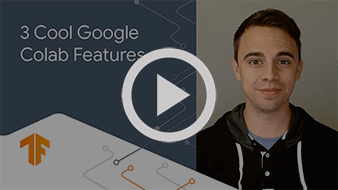
  </a>
</center>

<div class="markdown-google-sans">
  <h2>什么是 Colab？</h2>
</div>

借助 Colaboratory（简称 Colab），您可在浏览器中编写和执行 Python 代码，并且：
- 无需任何配置
- 免费使用 GPU
- 轻松共享

无论您是一名<strong>学生</strong>、<strong>数据科学家</strong>还是 <strong>AI 研究员</strong>，Colab 都能够帮助您更轻松地完成工作。您可以观看 <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab 简介</a>了解详情，或查看下面的入门指南！

# 新段落

In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
!wget -q -O detector.tflite -q https://storage.googleapis.com/mediapipe-models/face_detector/blaze_face_short_range/float16/1/blaze_face_short_range.tflite

In [ ]:
from typing import Tuple, Union
import math
import cv2
import numpy as np

MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (255, 0, 0)  # red


def _normalized_to_pixel_coordinates(
    normalized_x: float, normalized_y: float, image_width: int,
    image_height: int) -> Union[None, Tuple[int, int]]:
  """Converts normalized value pair to pixel coordinates."""

  # Checks if the float value is between 0 and 1.
  def is_valid_normalized_value(value: float) -> bool:
    return (value > 0 or math.isclose(0, value)) and (value < 1 or
                                                      math.isclose(1, value))

  if not (is_valid_normalized_value(normalized_x) and
          is_valid_normalized_value(normalized_y)):
    # TODO: Draw coordinates even if it's outside of the image bounds.
    return None
  x_px = min(math.floor(normalized_x * image_width), image_width - 1)
  y_px = min(math.floor(normalized_y * image_height), image_height - 1)
  return x_px, y_px


def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes and keypoints on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  annotated_image = image.copy()
  height, width, _ = image.shape

  for detection in detection_result.detections:
    # Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(annotated_image, start_point, end_point, TEXT_COLOR, 3)

    # Draw keypoints
    for keypoint in detection.keypoints:
      keypoint_px = _normalized_to_pixel_coordinates(keypoint.x, keypoint.y,
                                                     width, height)
      color, thickness, radius = (0, 255, 0), 2, 2
      cv2.circle(annotated_image, keypoint_px, thickness, color, radius)

    # Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    category_name = '' if category_name is None else category_name
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    cv2.putText(annotated_image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return annotated_image

In [ ]:
!wget -q -O image.jpg https://i.imgur.com/Vu2Nqwb.jpg

Saving 166.jpg to 166.jpg


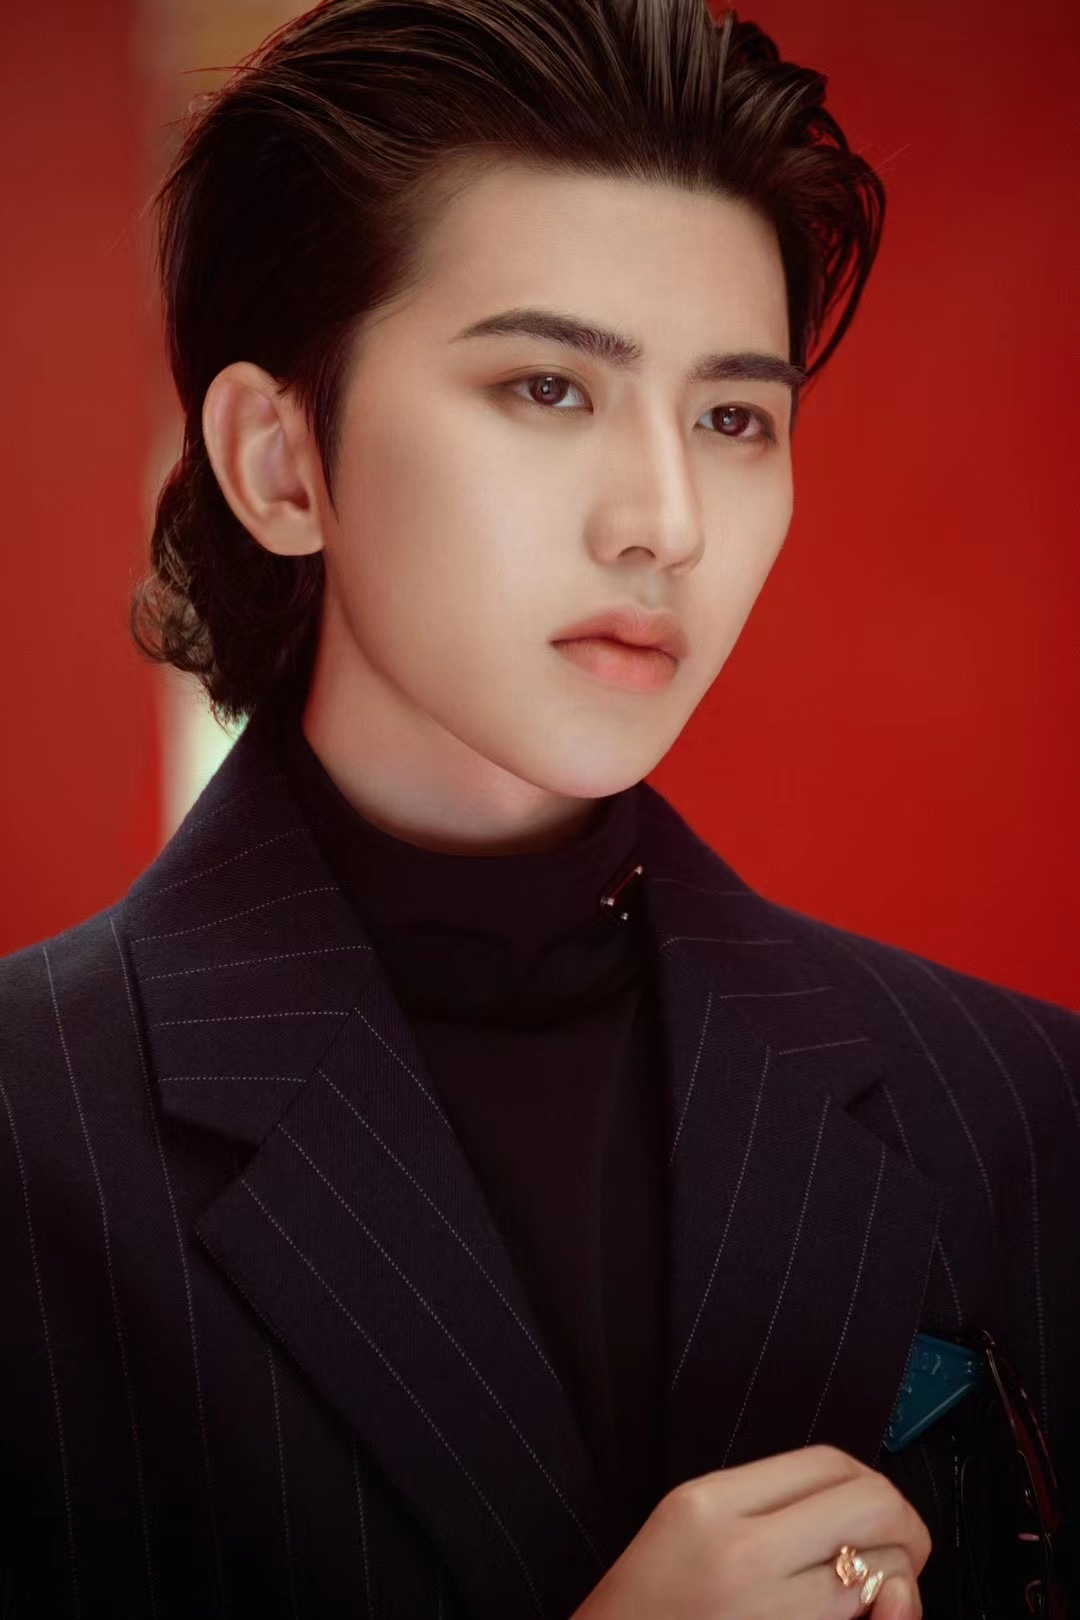

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
uploaded = files.upload()
IMAGE_FILE = '166.jpg'
img = cv2.imread(IMAGE_FILE)
cv2_imshow(img)

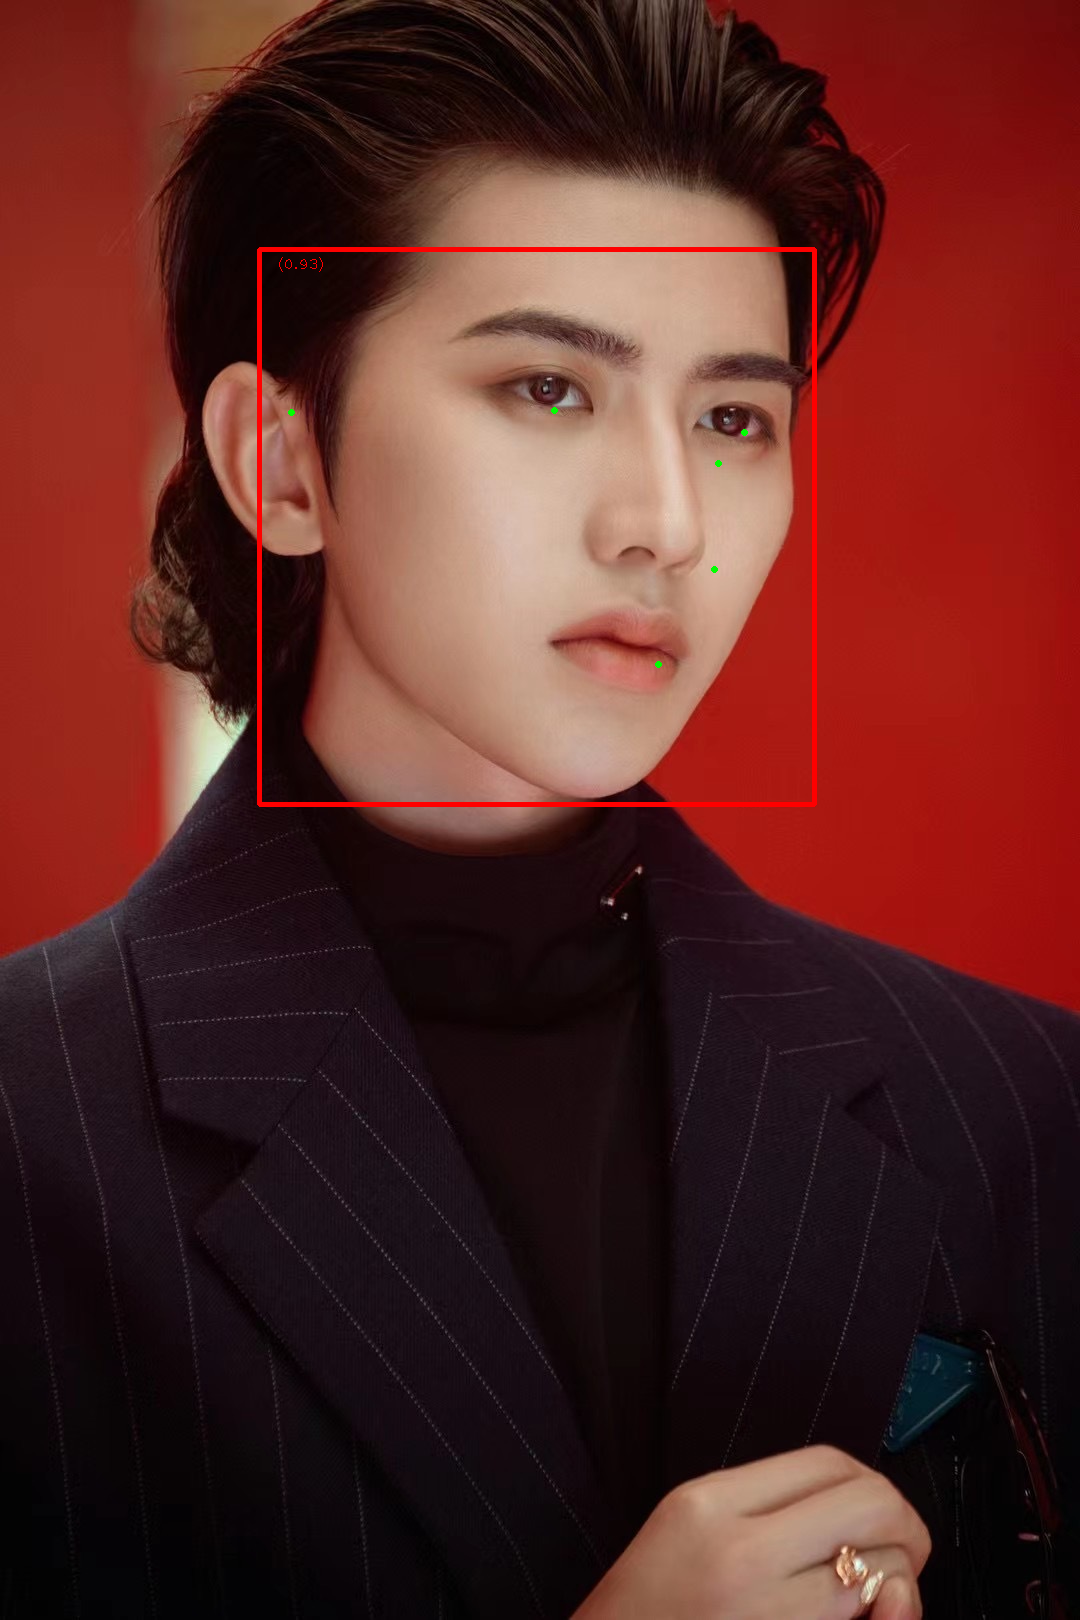

In [ ]:
# STEP 1: Import the necessary modules.
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceDetector object.
base_options = python.BaseOptions(model_asset_path='detector.tflite')
options = vision.FaceDetectorOptions(base_options=base_options)
detector = vision.FaceDetector.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file(IMAGE_FILE)

# STEP 4: Detect faces in the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb_annotated_image)

In [ ]:
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task


In [ ]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        #这个是脸部
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        #这个是眼睛轮廓和嘴轮廓
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        #这个是瞳孔
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())
    print(mp.solutions.face_mesh.FACEMESH_TESSELATION)
    print(mp.solutions.face_mesh.FACEMESH_CONTOURS)
    print(mp.solutions.face_mesh.FACEMESH_IRISES)
  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()


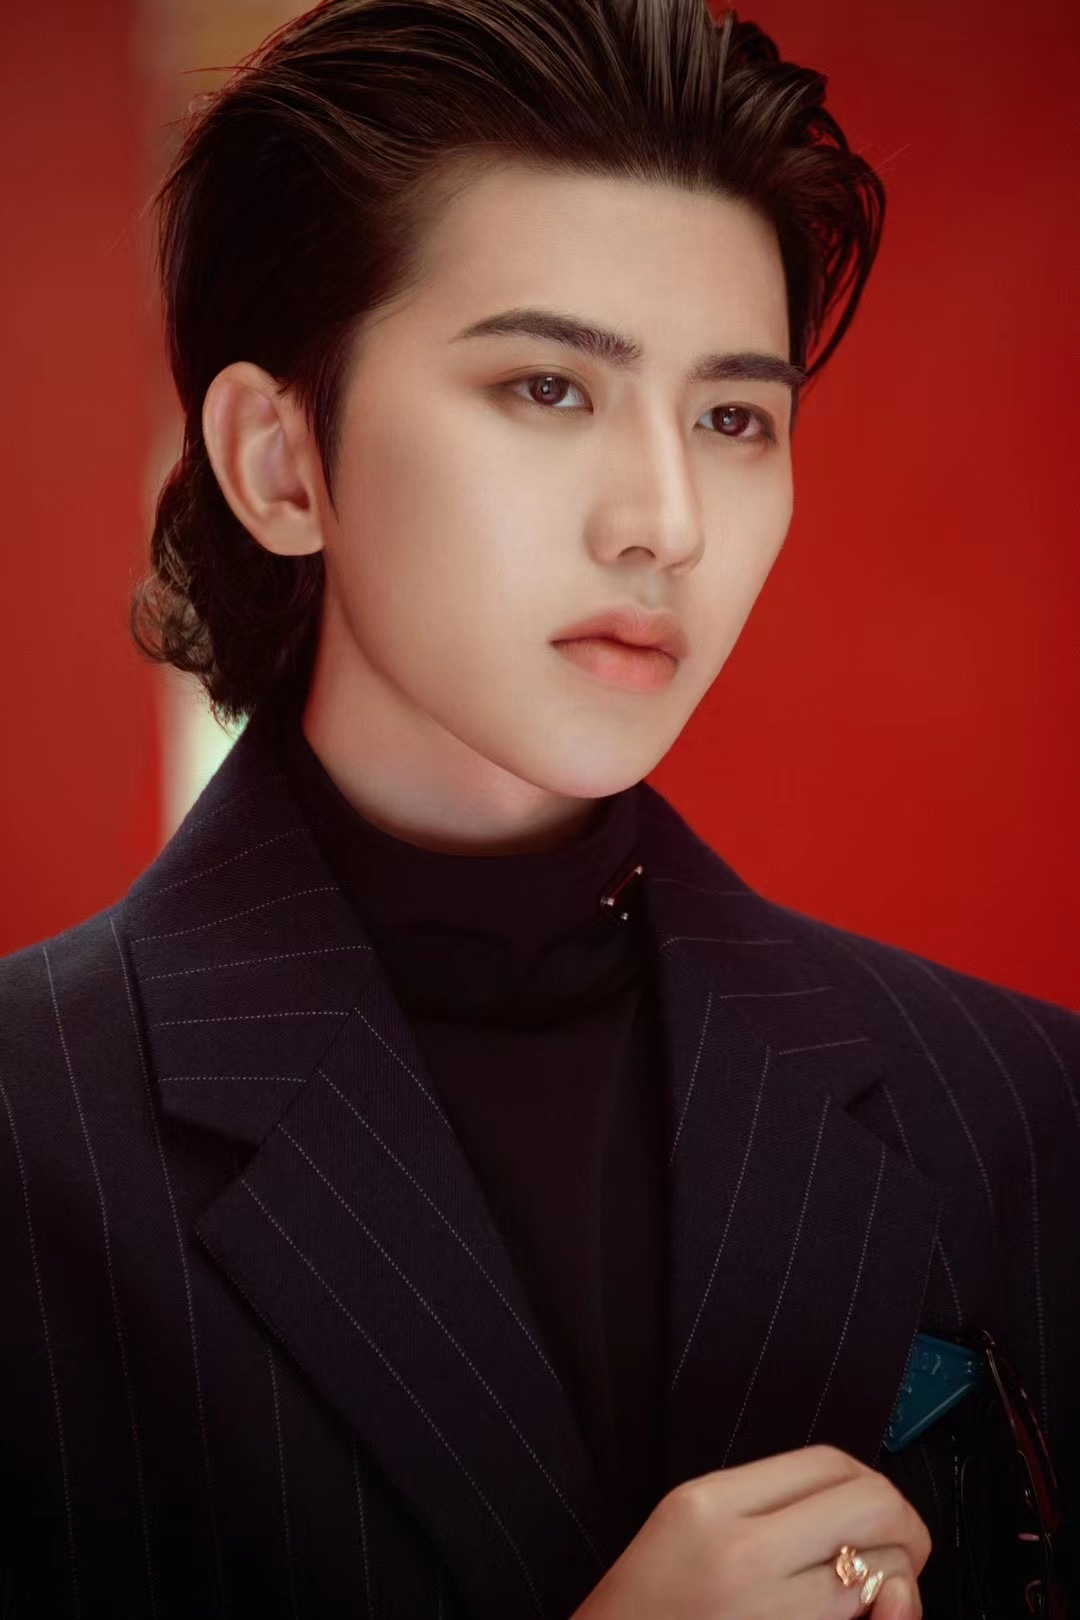

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("166.jpg")
cv2_imshow(img)

frozenset({(18, 17), (82, 38), (8, 9), (456, 248), (167, 2), (303, 271), (69, 104), (253, 450), (41, 42), (315, 16), (73, 74), (339, 373), (258, 385), (105, 63), (219, 48), (304, 272), (236, 217), (231, 22), (85, 84), (365, 367), (237, 218), (243, 112), (436, 427), (409, 410), (248, 456), (330, 266), (136, 135), (88, 95), (394, 430), (107, 108), (118, 117), (439, 438), (442, 443), (260, 466), (115, 48), (342, 276), (121, 128), (200, 421), (113, 124), (132, 137), (23, 230), (343, 357), (443, 444), (62, 78), (26, 155), (228, 110), (432, 434), (364, 379), (325, 308), (424, 430), (36, 205), (363, 420), (21, 162), (328, 462), (419, 351), (366, 345), (193, 8), (363, 456), (183, 80), (307, 375), (94, 2), (333, 284), (17, 313), (185, 40), (44, 1), (291, 287), (411, 352), (20, 238), (59, 166), (272, 310), (420, 437), (387, 260), (130, 226), (51, 45), (175, 377), (202, 214), (353, 383), (339, 448), (291, 408), (466, 260), (264, 454), (457, 440), (355, 429), (96, 89), (128, 121), (187, 207), (360

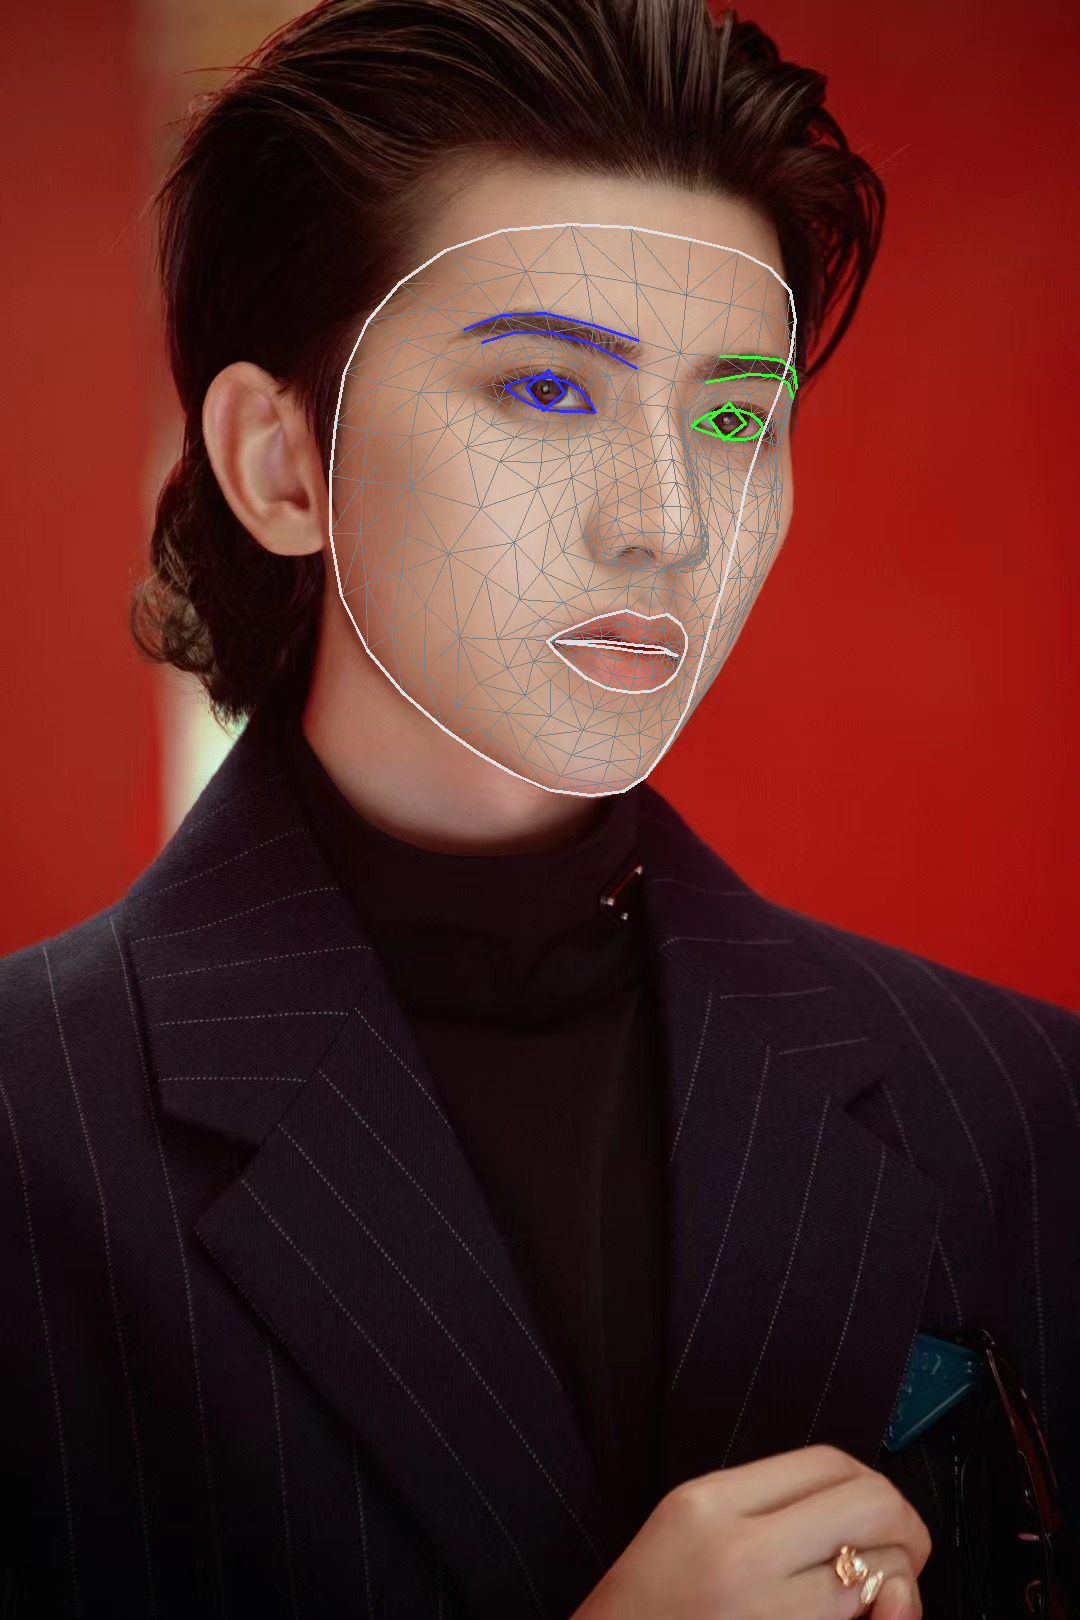

frozenset({(270, 409), (176, 149), (37, 0), (84, 17), (318, 324), (293, 334), (386, 385), (7, 163), (33, 246), (17, 314), (374, 380), (251, 389), (390, 373), (267, 269), (295, 285), (389, 356), (173, 133), (33, 7), (377, 152), (158, 157), (405, 321), (54, 103), (263, 466), (324, 308), (67, 109), (409, 291), (157, 173), (454, 323), (388, 387), (78, 191), (148, 176), (311, 310), (39, 37), (249, 390), (144, 145), (402, 318), (80, 81), (310, 415), (153, 154), (384, 398), (397, 365), (234, 127), (103, 67), (282, 295), (338, 297), (378, 400), (127, 162), (321, 375), (375, 291), (317, 402), (81, 82), (154, 155), (91, 181), (334, 296), (297, 332), (269, 270), (150, 136), (109, 10), (356, 454), (58, 132), (312, 311), (152, 148), (415, 308), (161, 160), (296, 336), (65, 55), (61, 146), (78, 95), (380, 381), (398, 362), (361, 288), (246, 161), (162, 21), (0, 267), (82, 13), (132, 93), (314, 405), (10, 338), (178, 87), (387, 386), (381, 382), (70, 63), (61, 185), (14, 317), (105, 66), (300, 293), 

In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("166.jpg")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
print(mp.solutions.face_mesh.FACEMESH_CONTOURS)

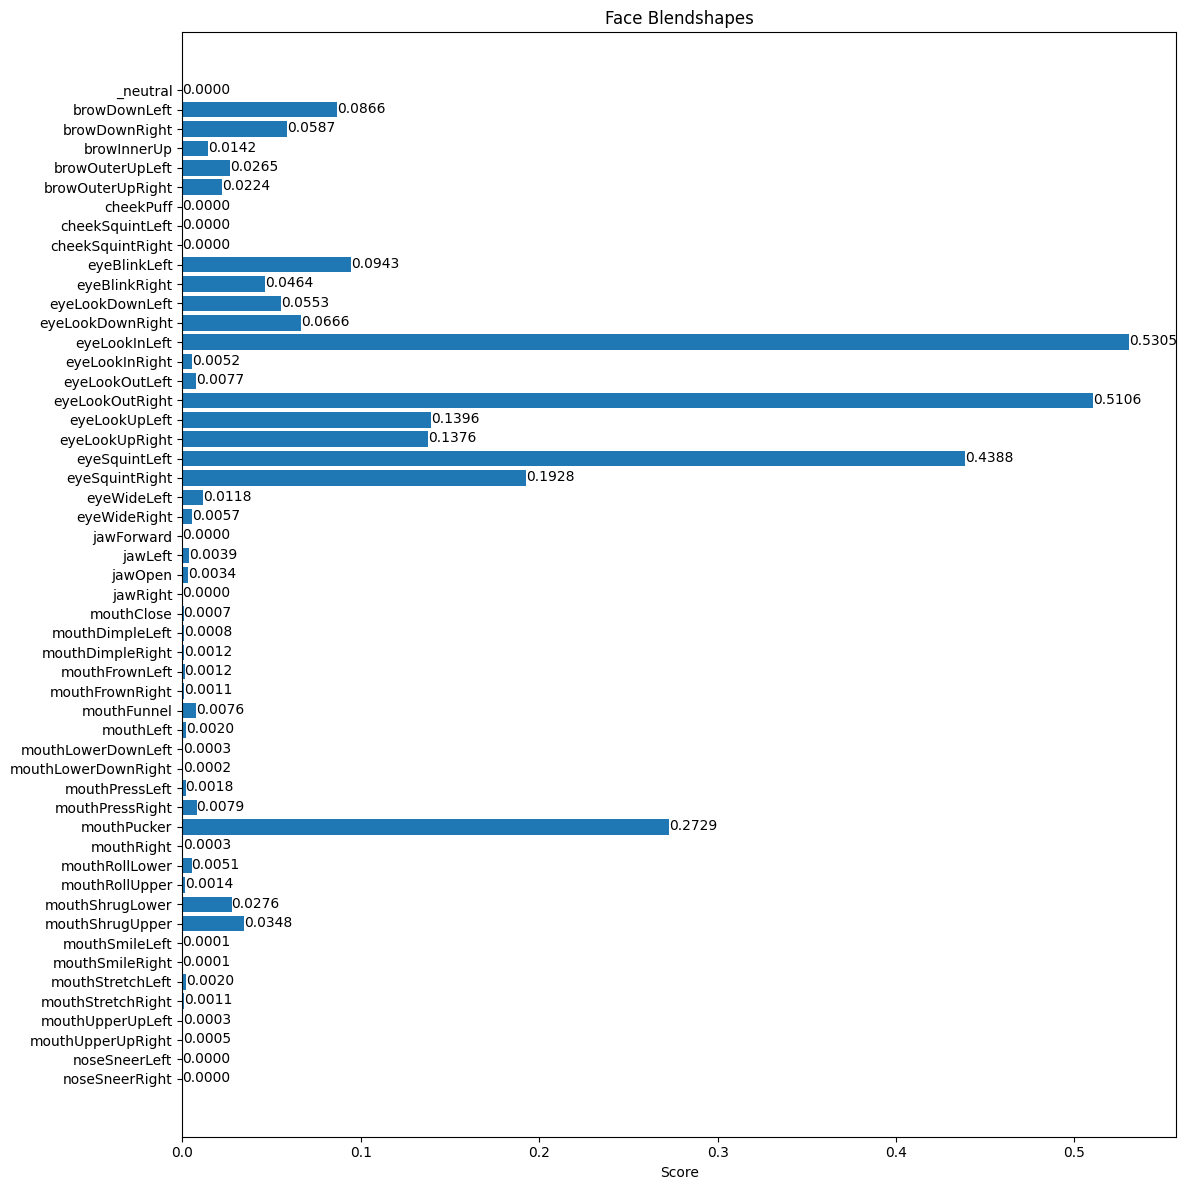

In [ ]:
plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])

In [ ]:
for landmarks in detection_result.face_landmarks:
    print(landmarks)
    for landmark in landmarks:
        print("x:", landmark.x)
        print("y:", landmark.y)
        print("z:", landmark.z)
        print("-" * 30)  # 分隔每个NormalizedLandmark对象的输出


[NormalizedLandmark(x=0.6005659103393555, y=0.38153666257858276, z=-0.04731906205415726, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6269958019256592, y=0.3421279191970825, z=-0.08842357993125916, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6083890795707703, y=0.35312795639038086, z=-0.044667039066553116, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6109551191329956, y=0.2984054386615753, z=-0.07662717252969742, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6313736438751221, y=0.32969117164611816, z=-0.09472521394491196, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6297081112861633, y=0.3125649690628052, z=-0.08894500881433487, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6201348304748535, y=0.268459677696228, z=-0.04784709960222244, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4759833812713623, y=0.24340753257274628, z=-0.04022255912423134, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6232526898384094, y=0.235653

In [ ]:
print(detection_result)

FaceLandmarkerResult(face_landmarks=[[NormalizedLandmark(x=0.6005659103393555, y=0.38153666257858276, z=-0.04731906205415726, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6269958019256592, y=0.3421279191970825, z=-0.08842357993125916, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6083890795707703, y=0.35312795639038086, z=-0.044667039066553116, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6109551191329956, y=0.2984054386615753, z=-0.07662717252969742, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6313736438751221, y=0.32969117164611816, z=-0.09472521394491196, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6297081112861633, y=0.3125649690628052, z=-0.08894500881433487, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6201348304748535, y=0.268459677696228, z=-0.04784709960222244, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4759833812713623, y=0.24340753257274628, z=-0.04022255912423134, visibility=0.0, presence=0.0), NormalizedLand

In [ ]:
# import cv2
# import numpy as np

# def extract_eye_landmarks(face_landmarks):
#     # 根据 MediaPipe face mesh 模型的关键点索引，提取眼睛的关键点
#     left_eye_landmarks = [(int(landmark.x * image_width), int(landmark.y * image_height))
#                           for landmark in face_landmarks[33:42]]  # 左眼关键点的索引范围为 33-42
#     right_eye_landmarks = [(int(landmark.x * image_width), int(landmark.y * image_height))
#                            for landmark in face_landmarks[42:51]]  # 右眼关键点的索引范围为 42-51

#     return left_eye_landmarks, right_eye_landmarks
# contour_coords = [
# (270, 409), (176, 149), (37, 0), (84, 17),
#  (318, 324), (293, 334), (386, 385),
#   (7, 163), (33, 246), (17, 314),
#    (374, 380), (251, 389), (390, 373),
#     (267, 269), (295, 285), (389, 356),
#      (173, 133), (33, 7), (377, 152),
#       (158, 157), (405, 321), (54, 103),
#        (263, 466), (324, 308), (67, 109),
#         (409, 291), (157, 173), (454, 323),
#          (388, 387), (78, 191), (148, 176),
#           (311, 310), (39, 37), (249, 390),
#            (144, 145), (402, 318), (80, 81),
#             (310, 415), (153, 154), (384, 398),
#              (397, 365), (234, 127), (103, 67),
#               (282, 295), (338, 297), (378, 400),
#                (127, 162), (321, 375), (375, 291),
#                 (317, 402), (81, 82), (154, 155),
#                  (91, 181), (334, 296), (297, 332),
#                   (269, 270), (150, 136), (109, 10),
#                    (356, 454), (58, 132), (312, 311),
#                     (152, 148), (415, 308), (161, 160),
#                      (296, 336), (65, 55), (61, 146),
#                       (78, 95), (380, 381), (398, 362),
#                        (361, 288), (246, 161), (162, 21),
#                         (0, 267), (82, 13), (132, 93),
#                          (314, 405), (10, 338), (178, 87),
#                           (387, 386), (381, 382), (70, 63),
#                            (61, 185), (14, 317), (105, 66), (300, 293),
#                             (382, 362), (88, 178), (185, 40), (46, 53),
#                              (284, 251), (400, 377), (136, 172), (323, 361),
#                               (13, 312), (21, 54), (172, 58), (373, 374),
#                                (163, 144), (276, 283), (53, 52), (365, 379),
#                                 (379, 378), (146, 91), (263, 249), (283, 282),
#                                  (87, 14), (145, 153), (155, 133), (93, 234),
#                                   (66, 107), (95, 88), (159, 158), (52, 65),
#                                    (332, 284), (40, 39), (191, 80), (63, 105),
#                                     (181, 84), (466, 388), (149, 150), (288, 397),
#                                      (160, 159), (385, 384)
# ]
# # 获取图像的宽度和高度
# image_width = image.width
# image_height = image.height

# # 提取左眼和右眼的关键点坐标
# left_eye_landmarks, right_eye_landmarks = extract_eye_landmarks(detection_result.face_landmarks[0])

# eye_landmarks = contour_coords
# # 创建一个黑色图像作为掩码
# mask = np.zeros((image_height, image_width, 3), dtype=np.uint8)

# # 在掩码上绘制左眼和右眼的形状并将其填充为白色
# # for (x, y) in left_eye_landmarks:
# #     cv2.circle(mask, (x, y), 3, (255, 255, 255), -1)

# # for (x, y) in right_eye_landmarks:
# #     cv2.circle(mask, (x, y), 3, (255, 255, 255), -1)
# for (x, y) in eye_landmarks:
#       cv2.circle(mask, (x, y), 1, (255, 255, 255), -1)
# # 反转掩码，使得眼睛部分为黑色
# mask = cv2.bitwise_not(mask)

# # 将mask应用于原始图像，将眼部区域扣除
# result_image = cv2.bitwise_and(annotated_image, mask)

# # 显示结果图像
# cv2_imshow(cv2.cvtColor(result_image, cv2.COLOR_RGB2BGR))


In [ ]:
def look_img(img):
  img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img_RGB)
  plt.show()

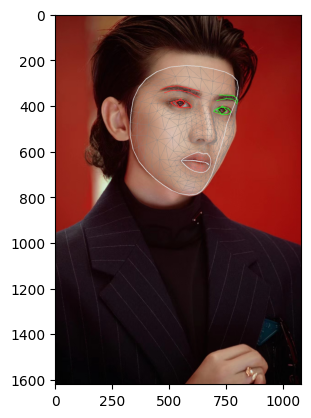

In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
mp_face_mesh = mp.solutions.face_mesh
model = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
)
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = model.process(img_RGB)
annotated_image = img.copy()#copy
face_landmarks = results.multi_face_landmarks[0]
mp_drawing.draw_landmarks(
    #这个是脸部
    image=annotated_image,
    landmark_list=face_landmarks,
    connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
    landmark_drawing_spec=None,
    connection_drawing_spec=mp.solutions.drawing_styles
    .get_default_face_mesh_tesselation_style())
mp_drawing.draw_landmarks(
    #这个是眼睛轮廓和嘴轮廓
    image=annotated_image,
    landmark_list=face_landmarks,
    connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
    landmark_drawing_spec=None,
    connection_drawing_spec=mp.solutions.drawing_styles
    .get_default_face_mesh_contours_style())
mp_drawing.draw_landmarks(
    #这个是瞳孔
    image=annotated_image,
    landmark_list=face_landmarks,
    connections=mp.solutions.face_mesh.FACEMESH_IRISES,
    landmark_drawing_spec=None,
    connection_drawing_spec=mp.solutions.drawing_styles
    .get_default_face_mesh_iris_connections_style())
look_img(annotated_image)


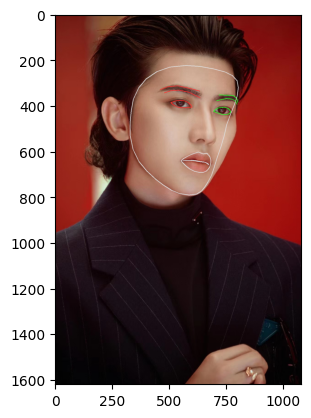

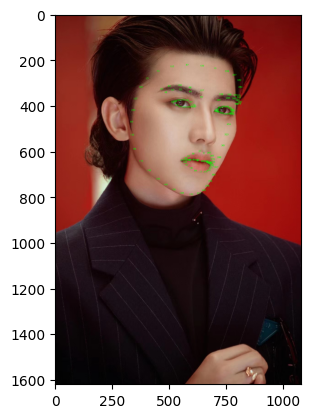

True

In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
mp_face_mesh = mp.solutions.face_mesh
model = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
)
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = model.process(img_RGB)
annotated_image = img.copy()#copy
face_landmarks = results.multi_face_landmarks[0]
h, w = img.shape[0], img.shape[1]
scaler = 1
imgId = img.copy()
position2 = [point[0] for point in mp.solutions.face_mesh.FACEMESH_CONTOURS]
position2 += [point[1] for point in mp.solutions.face_mesh.FACEMESH_CONTOURS]
mp_drawing.draw_landmarks(
    #这个是眼睛轮廓和嘴轮廓
    image=annotated_image,
    landmark_list=face_landmarks,
    connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
    landmark_drawing_spec=None,
    connection_drawing_spec=mp.solutions.drawing_styles
    .get_default_face_mesh_contours_style())
for idx, coord in enumerate(face_landmarks.landmark):
  if idx in position2:
    cx = int(coord.x * w)
    cy = int(coord.y * h)
    imgId = cv2.putText(imgId, str(idx), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.3 * scaler, (0, 255, 0), 1)
look_img(annotated_image)
look_img(imgId)
cv2.imwrite("id.jpg",imgId)


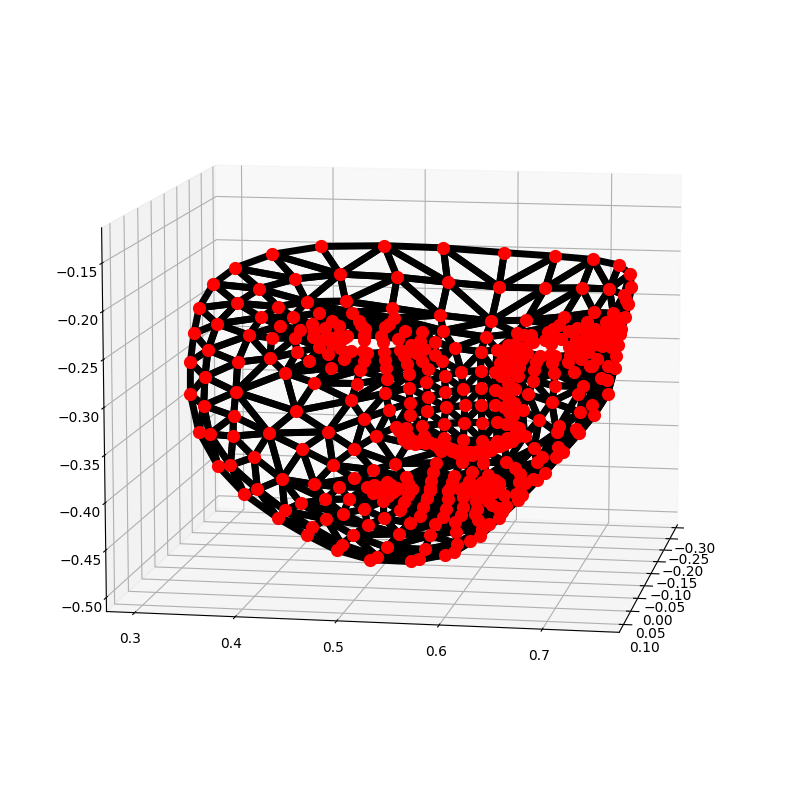

In [ ]:
mp_drawing.plot_landmarks(face_landmarks,mp.solutions.face_mesh.FACEMESH_TESSELATION)

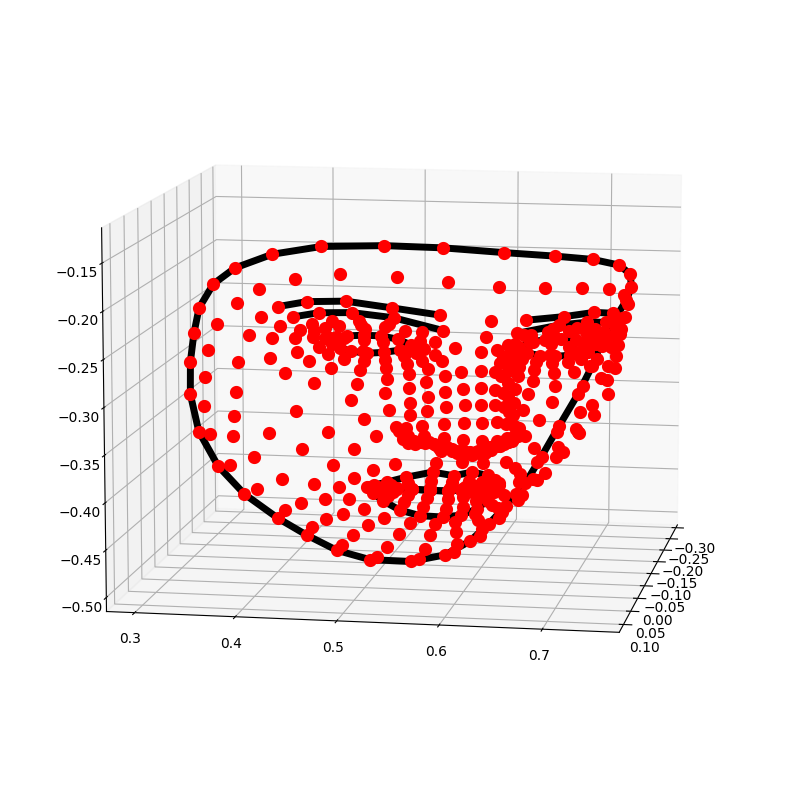

In [ ]:
mp_drawing.plot_landmarks(face_landmarks,mp.solutions.face_mesh.FACEMESH_CONTOURS)

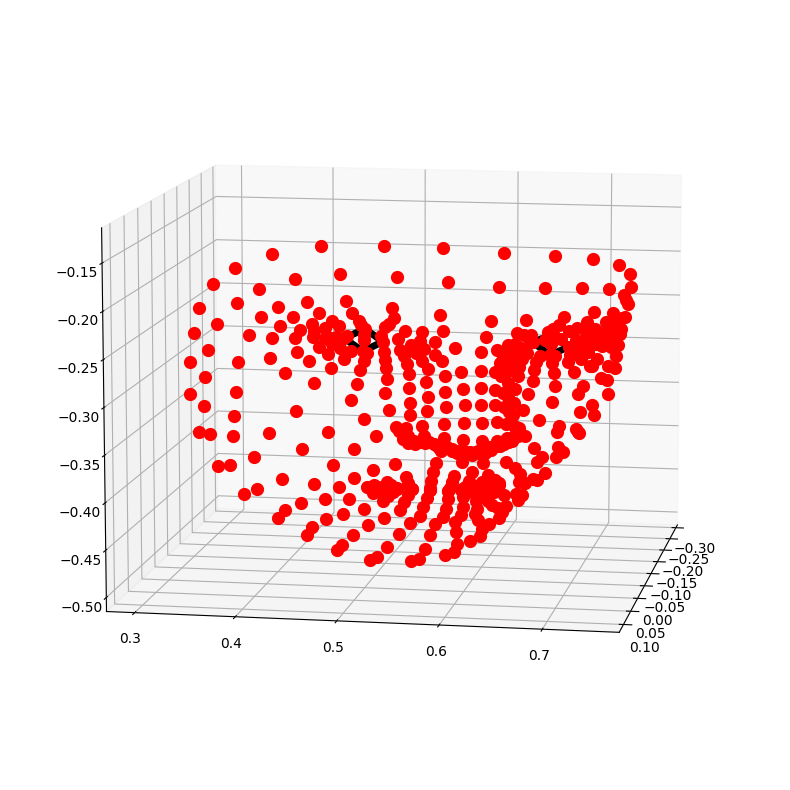

In [ ]:
mp_drawing.plot_landmarks(face_landmarks,mp.solutions.face_mesh.FACEMESH_IRISES)

In [ ]:
#连接关系
print(mp.solutions.face_mesh.FACEMESH_CONTOURS)
print(mp.solutions.face_mesh.FACEMESH_IRISES)

frozenset({(270, 409), (176, 149), (37, 0), (84, 17), (318, 324), (293, 334), (386, 385), (7, 163), (33, 246), (17, 314), (374, 380), (251, 389), (390, 373), (267, 269), (295, 285), (389, 356), (173, 133), (33, 7), (377, 152), (158, 157), (405, 321), (54, 103), (263, 466), (324, 308), (67, 109), (409, 291), (157, 173), (454, 323), (388, 387), (78, 191), (148, 176), (311, 310), (39, 37), (249, 390), (144, 145), (402, 318), (80, 81), (310, 415), (153, 154), (384, 398), (397, 365), (234, 127), (103, 67), (282, 295), (338, 297), (378, 400), (127, 162), (321, 375), (375, 291), (317, 402), (81, 82), (154, 155), (91, 181), (334, 296), (297, 332), (269, 270), (150, 136), (109, 10), (356, 454), (58, 132), (312, 311), (152, 148), (415, 308), (161, 160), (296, 336), (65, 55), (61, 146), (78, 95), (380, 381), (398, 362), (361, 288), (246, 161), (162, 21), (0, 267), (82, 13), (132, 93), (314, 405), (10, 338), (178, 87), (387, 386), (381, 382), (70, 63), (61, 185), (14, 317), (105, 66), (300, 293), 

In [ ]:
face_landmarks
coords = np.array(face_landmarks.landmark)
print(coords)
#各个关键点的坐标

[x: 0.5994558334350586
 y: 0.3779962956905365
 z: -0.050556495785713196 x: 0.6303988695144653
                          y: 0.34170767664909363
                          z: -0.09026654064655304 x: 0.6104949116706848
                                                  y: 0.3534335792064667
                                                  z: -0.0472399964928627
 x: 0.6147216558456421
 y: 0.29761457443237305
 z: -0.07664179056882858 x: 0.6351654529571533
                         y: 0.32928964495658875
                         z: -0.09605366736650467 x: 0.6337543725967407
                                                 y: 0.31205904483795166
                                                 z: -0.08922697603702545
 x: 0.6244726777076721
 y: 0.2676655352115631
 z: -0.04452056810259819 x: 0.4767969846725464
                         y: 0.24423366785049438
                         z: -0.04203419014811516 x: 0.6274378299713135
                                                 y: 0.2341475188732147

In [ ]:
face_landmarks.landmark[355]
#某一个关键点的坐标

x: 0.6484290361404419
y: 0.31169813871383667
z: 0.006112764589488506

In [ ]:
#关键点的坐标为在图像中的比例，需要乘图像的绝对像素大小得到真正的坐标
h, w = img.shape[0], img.shape[1]
print(h, w)
cx = face_landmarks.landmark[355].x * w
cy = face_landmarks.landmark[355].y * h
print(int(cx), int(cy))

1620 1080
700 504


729 439


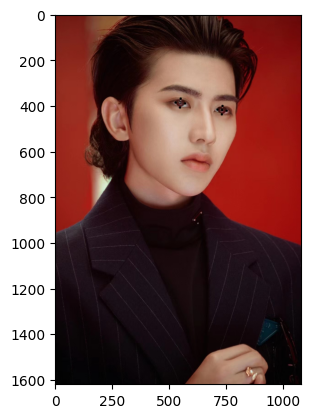

In [ ]:
# 画出某一个点
imgTest = img.copy()
cx = face_landmarks.landmark[469].x * w
cy = face_landmarks.landmark[469].y * h
imgTest = cv2.circle(imgTest, (int(cx), int(cy)), 5, (0, 0, 0), -1)
cx = face_landmarks.landmark[470].x * w
cy = face_landmarks.landmark[470].y * h
imgTest = cv2.circle(imgTest, (int(cx), int(cy)), 5, (0, 0, 0), -1)
cx = face_landmarks.landmark[471].x * w
cy = face_landmarks.landmark[471].y * h
imgTest = cv2.circle(imgTest, (int(cx), int(cy)), 5, (0, 0, 0), -1)
cx = face_landmarks.landmark[472].x * w
cy = face_landmarks.landmark[472].y * h
imgTest = cv2.circle(imgTest, (int(cx), int(cy)), 5, (0, 0, 0), -1)
cx = face_landmarks.landmark[473].x * w
cy = face_landmarks.landmark[473].y * h
imgTest = cv2.circle(imgTest, (int(cx), int(cy)), 5, (0, 0, 0), -1)
cx = face_landmarks.landmark[474].x * w
cy = face_landmarks.landmark[474].y * h
imgTest = cv2.circle(imgTest, (int(cx), int(cy)), 5, (0, 0, 0), -1)
cx = face_landmarks.landmark[475].x * w
cy = face_landmarks.landmark[475].y * h
imgTest = cv2.circle(imgTest, (int(cx), int(cy)), 5, (0, 0, 0), -1)
cx = face_landmarks.landmark[476].x * w
cy = face_landmarks.landmark[476].y * h
imgTest = cv2.circle(imgTest, (int(cx), int(cy)), 5, (0, 0, 0), -1)
cx = face_landmarks.landmark[477].x * w
cy = face_landmarks.landmark[477].y * h
imgTest = cv2.circle(imgTest, (int(cx), int(cy)), 5, (0, 0, 0), -1)
print(int(cx),int(cy))
look_img(imgTest)

In [ ]:
def get_x(each):
  return each.x
def get_y(each):
  return each.y
points_x = np.array(list(map(get_x, coords)))
points_y = np.array(list(map(get_y, coords)))
points = np.vstack((points_x, points_y)).T
points_real_x = np.array([int(x * w) for x in points_x])
points_real_y = np.array([int(y * h) for y in points_y])
points_real = np.vstack((points_real_x, points_real_y)).T
print(points_real)

[[647 612]
 [680 553]
 [659 572]
 [663 482]
 [685 533]
 [684 505]
 [674 433]
 [514 395]
 [677 379]
 [684 350]
 [693 240]
 [645 624]
 [641 637]
 [637 646]
 [636 647]
 [636 661]
 [634 677]
 [631 693]
 [618 714]
 [673 563]
 [648 561]
 [398 284]
 [570 422]
 [550 422]
 [529 419]
 [501 401]
 [588 419]
 [549 358]
 [572 363]
 [526 359]
 [510 365]
 [477 412]
 [532 733]
 [506 387]
 [377 384]
 [447 392]
 [551 519]
 [626 604]
 [621 634]
 [597 614]
 [577 624]
 [601 634]
 [583 637]
 [531 664]
 [665 551]
 [667 531]
 [478 345]
 [596 468]
 [602 539]
 [599 526]
 [479 507]
 [666 505]
 [542 333]
 [507 335]
 [445 252]
 [634 366]
 [590 374]
 [522 642]
 [341 593]
 [613 552]
 [628 560]
 [551 642]
 [556 642]
 [493 318]
 [595 548]
 [585 342]
 [584 324]
 [572 225]
 [476 285]
 [588 274]
 [459 331]
 [432 310]
 [624 620]
 [599 625]
 [580 631]
 [616 557]
 [553 642]
 [563 647]
 [558 642]
 [632 547]
 [584 641]
 [601 640]
 [619 642]
 [593 710]
 [608 688]
 [612 672]
 [616 656]
 [618 644]
 [583 641]
 [580 646]
 [575 654]

[475, 477, 469, 472, 471, 474, 476, 470, 476, 474, 470, 469, 472, 475, 477, 471]


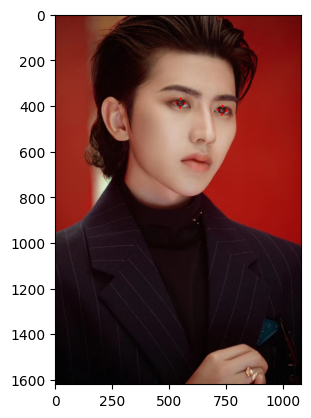

In [ ]:
import cv2
import numpy as np

def draw_points_on_image(image, points):
    for point in points:
        cv2.circle(image, point, 5, (0, 0, 255), -1)

    return image
# FACEMESH_CONTOURS
# FACEMESH_TESSELATION
position1 = [point[0] for point in mp.solutions.face_mesh.FACEMESH_IRISES]
position1 += [point[1] for point in mp.solutions.face_mesh.FACEMESH_IRISES]
print(position1)
annotated_image1 = img.copy()#copy
coordinates = np.array([points_real[i] for i in position1 if i < len(points_real)])
annotated_image_with_points = draw_points_on_image(annotated_image1, coordinates)
look_img(annotated_image_with_points)


In [ ]:
def bilinearInsert(src, ux, uy):
    w, h, c = src.shape
    if c == 3:
        x1 = int(ux)
        x2 = x1 + 1
        y1 = int(uy)
        y2 = y1 + 1
        part1 = src[y1, x1].astype(float) * (float(x2) - ux) * (float(y2) - uy)
        part2 = src[y1, x2].astype(float) * (ux - float(x1)) * (float(y2) - uy)
        part3 = src[y2, x1].astype(float) * (float(x2) - ux) * (uy - float(y1))
        part4 = src[y2, x2].astype(float) * (ux - float(x1)) * (uy - float(y1))
        insertValue = part1 + part2 + part3 + part4
        return insertValue.astype(np.int8)

In [ ]:
def localTranslationWarp(srcImg, startX, startY, endX, endY, radius):
    ddradius = float(radius * radius)
    copyImg = np.zeros(srcImg.shape, np.uint8)
    copyImg = srcImg.copy()
    # 计算公式中的|m-c|^2
    ddmc = (endX - startX) * (endX - startX) + (endY - startY) * (endY - startY)
    H, W, C = srcImg.shape
    for i in range(W):
        for j in range(H):
            # 计算该点是否在形变圆的范围之内
            # 优化，第一步，直接判断是会在（startX,startY)的矩阵框中
            if math.fabs(i - startX) > radius and math.fabs(j - startY) > radius:
                continue
            distance = (i - startX) * (i - startX) + (j - startY) * (j - startY)
            if (distance < ddradius):
                # 计算出（i,j）坐标的原坐标
                # 计算公式中右边平方号里的部分
                ratio = (ddradius - distance) / (ddradius - distance + ddmc)
                ratio = ratio * ratio
                # 映射原位置(向后变形，j后+变-即为向前变形)
                UX = i + ratio * (endX - startX)
                UY = j + ratio * (endY - startY)
                # 根据双线性插值法得到UX，UY的值
                value = bilinearInsert(srcImg, UX, UY)
                # 改变当前 i ，j的值
                copyImg[j, i] = value
    return copyImg

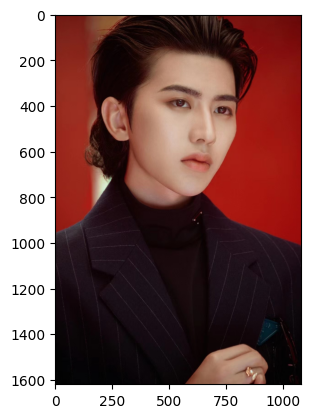

In [ ]:
def face_adjust_custom(src, points_real):
    thin_image = src
    start_landmark1 = points_real[163]
    end_landmark1 = points_real[161]
    start_landmark2 = points_real[155]
    end_landmark2 = points_real[157]
    r = math.sqrt((start_landmark1[0] - end_landmark1[0]) ** 2 + (start_landmark1[1] - end_landmark1[1]) ** 2)
    thin_image = localTranslationWarp(thin_image, start_landmark1[0], start_landmark1[1], end_landmark1[0], end_landmark1[1], r)
    thin_image = localTranslationWarp(thin_image, start_landmark2[0], start_landmark2[1], end_landmark2[0], end_landmark2[1], r)
    start_landmark1 = points_real[381]
    end_landmark1 = points_real[384]
    start_landmark2 = points_real[249]
    end_landmark2 = points_real[387]
    r = math.sqrt((start_landmark1[0] - end_landmark1[0]) ** 2 + (start_landmark1[1] - end_landmark1[1]) ** 2)
    thin_image = localTranslationWarp(thin_image, start_landmark1[0], start_landmark1[1], end_landmark1[0], end_landmark1[1], r)
    thin_image = localTranslationWarp(thin_image, start_landmark2[0], start_landmark2[1], end_landmark2[0], end_landmark2[1], r)
    cv2.imwrite(r'thin_custom.jpg', thin_image)
    look_img(thin_image)
thin_image = img.copy()
face_adjust_custom(thin_image, points_real)